# Лекция 1. Описательные статистики. Квантили, квартили. Гистограммы.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Получение объекта таблицы с помощью библиотеки Pandas 

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [6]:
# Полезные параметры:
# sep -- задаёт символ-разделитель полей в файле (по умолчанию разделитель запятая);
# names -- список названий колонок, если он не задан в файле;
# index_col -- номер колонки с индексом.
# decimal -- символ-разделитель для знаков после запятой.
AH = pd.read_csv('AmesHousing.txt', sep="\t", header = 0, index_col=False) # Элемент таблицы

In [7]:
AH.head() # Запрос на отображение первых 5 строк

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
print(AH.shape) # Размерность таблицы
print(len(AH)) # Кол-во строк таблицы

(2930, 82)
2930


In [9]:
AH.dtypes # Типы данных для каждого столбца

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [10]:
print(AH['MS Zoning'].value_counts()) # Подсчитать кол-во элементов по группам

RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64


### Описательные статистики из объекта таблицы 

In [11]:
AH.describe(include='all')

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,...,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,...,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,...,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,...,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,...,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,12789.000000
25%,733.25000,5.284770e+08,20.000000,NaN,58.000000,7440.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129500.000000
50%,1465.50000,5.354536e+08,50.000000,NaN,68.000000,9436.500000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,160000.000000
75%,2197.75000,9.071811e+08,70.000000,NaN,80.000000,11555.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,213500.000000


In [12]:
print(AH['Order'].mean())
print(AH['MS SubClass'].std())

1465.5
42.638024553802126


### Построение гистограмм 

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

In [13]:
# выбор темы картинок на Ваш вкус. Необязательная строчка.
matplotlib.style.use('ggplot')
# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

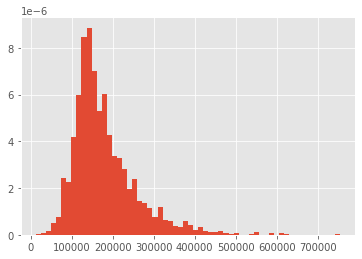

In [14]:
AH['SalePrice'].hist(bins=60, density=True);

In [15]:
print(plt.style.available) # Стили построения гистограмм

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


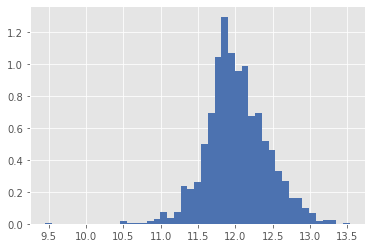

In [16]:
matplotlib.style.use('seaborn-deep') # Выбираем другой стиль
np.log(AH['SalePrice']).hist(bins=45, density=True); # Гистограмма в логарифмическом масштабе

### Ядерная функция приближения плотности распределения

In [17]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace,hstack
from pylab import plot,show,hist

*Примечание*: одновременно строить и гистограмму и ядерную функцию **бессмысленно**. Это дублирование информации. Ниже это сделано лишь для наглядности отображения работы функций.

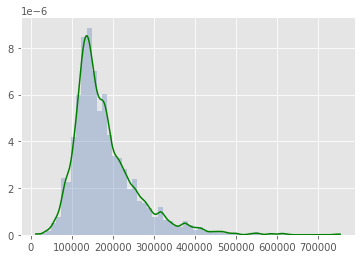

In [18]:
my_density = gaussian_kde(AH['SalePrice'], bw_method = 0.1) # bw_method отвечает за "грубость" приближения распределения к гистограмме:
                                                            # Чем меньше bw_method, тем более ядерная функция похожа на гистограмму
x = linspace(min(AH['SalePrice']), max(AH['SalePrice']),1000)
plot(x, my_density(x),'g')
hist(AH['SalePrice'], density=True, alpha=.3, bins=60) # histogram
show()

### Построение нескольких гистограмм на одном графике 

*Примечание*: возможность построения нескольких гистограмм на одном графике существует, однако часто является малоинформативной (без нормализации - полностью неинформативной). При сравнительном анализе нескольких переменных используют box-plot.

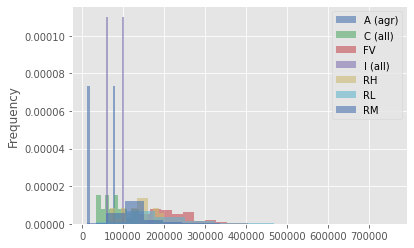

In [19]:
# По идее, вызов должен быть такой: df.groupby('Status')['Length'].hist(alpha=0.6)
# Но из-за бага https://github.com/pandas-dev/pandas/issues/10756
# приходится делать дополнительный вызов plot
AH.groupby('MS Zoning')['SalePrice'].plot.hist(alpha=0.6, density=True) # Строим переменную SalePrice, сгруппированную по переменной MS Zoning
# Добавляем легенду
plt.legend();